In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:

# Read the CSV file
df_stock = pd.read_csv('../Data/MSFT_historical_data_yfinance.csv')
df_stock['Date'] = pd.to_datetime(df_stock['Date'])
df_stock.set_index('Date', inplace=True)
df_stock.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2023-12-07,368.230011,371.450012,366.320007,370.950012,23118900
2023-12-08,369.200012,374.459991,368.230011,374.230011,20144800
2023-12-11,368.480011,371.600006,366.100006,371.299988,27708800
2023-12-12,370.850006,374.420013,370.459991,374.380005,24793900
2023-12-13,376.019989,377.636108,375.079987,375.880188,4696314


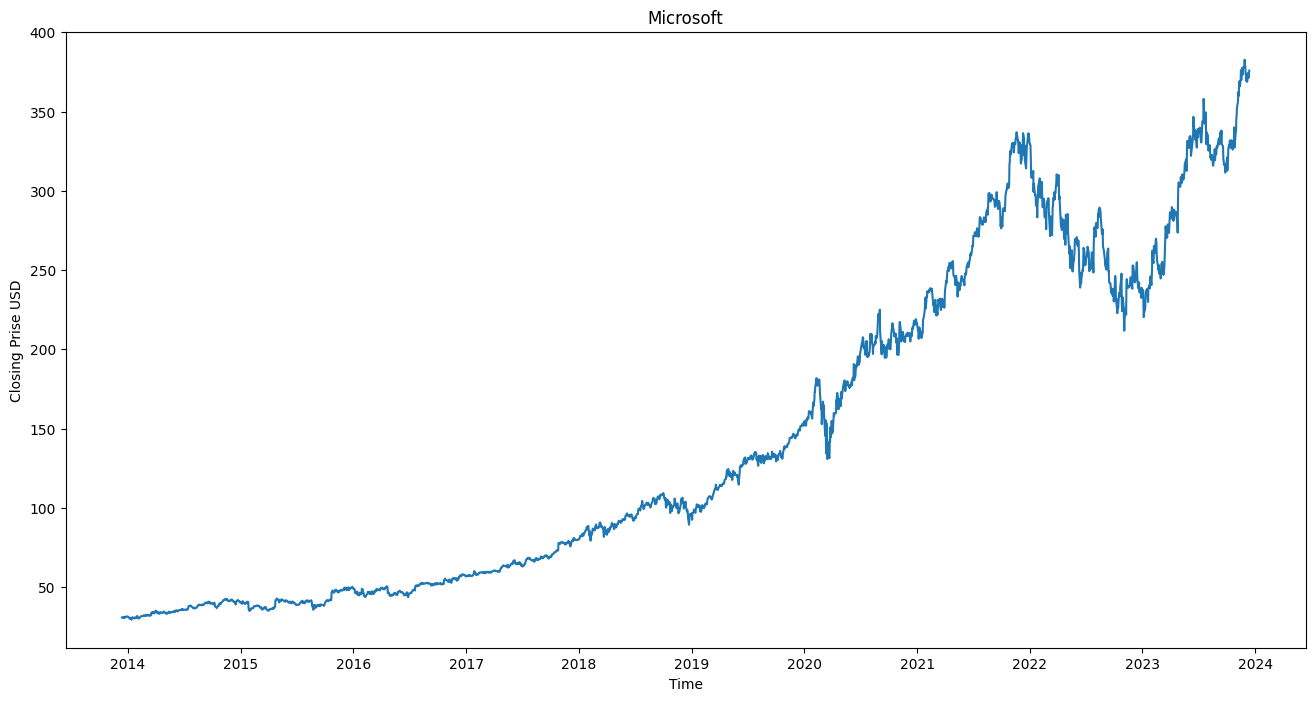

In [3]:
#Visualizing the closing prices of the stock

plt.figure(figsize=(16,8))
plt.title('Microsoft')
plt.xlabel('Time')
plt.ylabel('Closing Prise USD')
plt.plot(df_stock['Close'])
plt.show()

In [13]:
# Predicting 100 days into the future.
future_days = 100
df_prediction = df_stock[['Open','High','Low','Close']]
df_prediction = pd.DataFrame(df_prediction)
df_prediction['Prediction'] = df_prediction['Close'].shift(-future_days)

X = np.array(df_prediction.drop(['Prediction'], axis=1))[:-future_days]
print(X)
y = np.array(df_prediction['Prediction'])[:-future_days]
print(y)

[[ 31.50976254  31.53502643  30.83611778  30.89506149]
 [ 30.9287324   31.15608803  30.76874284  31.0634613 ]
 [ 31.10556186  31.24871312  30.59191016  30.75189972]
 ...
 [352.10834952 356.49015385 343.94223615 345.43603516]
 [347.70661042 348.85185025 338.42513193 342.34884644]
 [344.42025005 345.48583393 340.89487603 343.68328857]]
[ 33.54458618  33.90937805  34.53306198 ... 371.29998779 374.38000488
 375.88018799]


In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Implementing Linear and Decision Tree Regression Algorithms.
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

x_future = df_prediction.drop(['Prediction'], axis=1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[249.17863997, 249.34756609, 244.2399808 , 244.71696472],
       [244.99518733, 249.81459273, 244.06111282, 249.52642822],
       [250.59961239, 254.00797445, 249.80465441, 253.68005371],
       [254.81287914, 258.47961147, 254.36571999, 255.25010681],
       [254.68367655, 256.06492531, 251.79203948, 252.54724121],
       [252.43794989, 252.93479676, 249.22832337, 252.10009766],
       [254.20673355, 257.92313834, 249.99346673, 250.72880554],
       [249.49662648, 251.19583429, 246.03857651, 247.02232361],
       [245.83982296, 256.28355377, 244.18035625, 252.31871033],
       [255.13085475, 259.42361876, 254.24646797, 259.14538574],
       [258.34049326, 264.79950216, 257.57532972, 263.76605225],
       [263.53750668, 274.81593662, 261.61968505, 274.45822144],
       [276.50521155, 281.54321543, 274.57744339, 277.66781616],
       [275.23332071, 275.73016762, 268.14827904, 270.51327515],
       [273.14653596, 273.26577435, 267.82032182, 272.0534668 ],
       [271.67586147, 279

In [9]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[349.52905273 336.37362671 329.41137695 336.97116089 334.53131104
 334.94955444 326.14611816 342.34884644 326.42495728 328.74533081
 324.7020874  233.41668701 236.63180542 319.68295288 322.70040894
 320.52941895 319.75100708 316.23815918 315.83895874 321.22802734
 234.70162964 326.33764648 331.09796143 322.32580566 323.04434204
 327.74478149 328.12402344 327.09613037 327.99429321 327.99429321
 332.20574951 329.24176025 333.59289551 337.25549316 331.09796143
 335.37930298 338.01394653 329.55111694 315.83895874 248.31892395
 320.12026978 318.88278198 316.3678894  316.89682007 311.50775146
 312.15643311 313.00473022 315.11044312 321.14816284 312.75521851
 318.31393433 318.71310425 326.59713745 268.6965332  327.72485352
 331.74667358 330.48922729 327.06619263 331.96624756 331.38739014
 329.44134521 330.64889526 326.0083313  369.67001343 329.86050415
 339.97998047 270.34527588 329.14196777 336.62677002 305.91833496
 345.36901855 347.61447144 352.08538818 355.80783081 359.79974365
 362.46432

In [10]:
predictions = tree_prediction
valid = df_prediction[X.shape[0]:]
valid['Predictions'] = predictions

/tmp/ipykernel_297634/1820238457.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


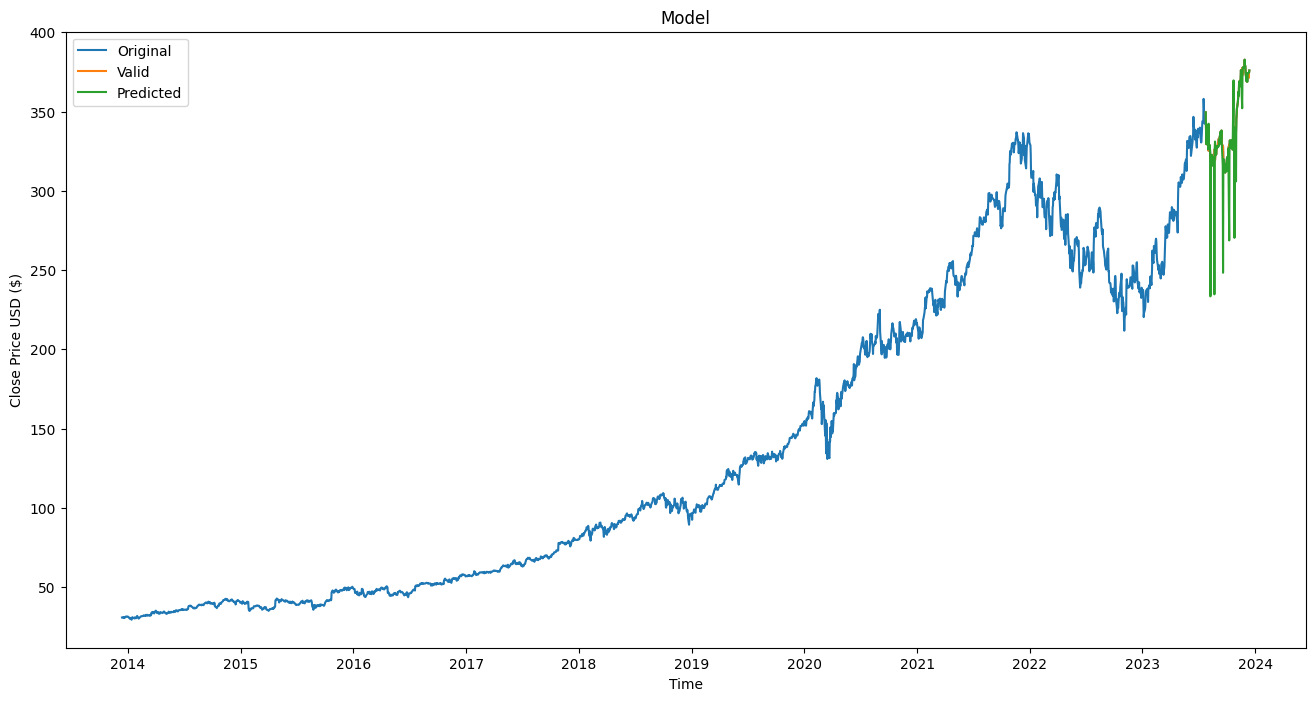

In [11]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Time')
plt.ylabel('Close Price USD ($)')
plt.plot(df_prediction['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

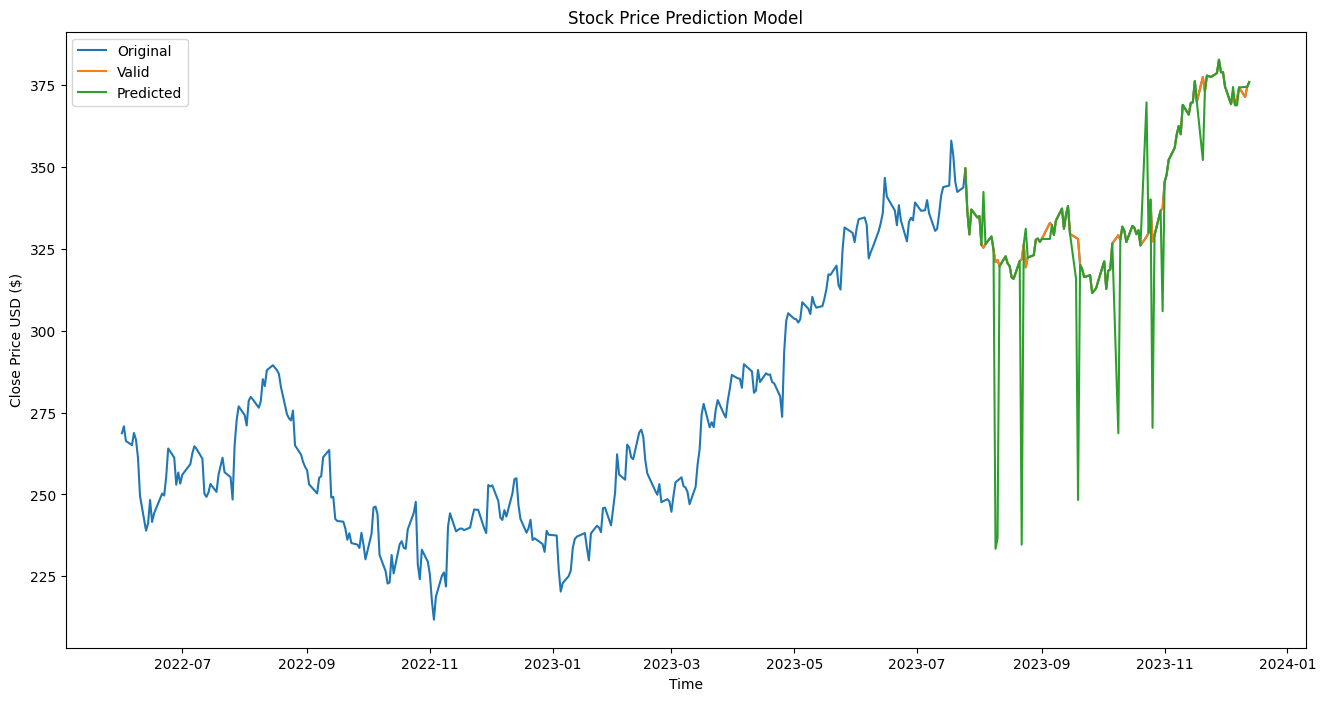

In [12]:
df_prediction = df_prediction[df_prediction.index >= '2022-06-01'] 


plt.figure(figsize=(16,8))
plt.title("Stock Price Prediction Model")
plt.xlabel('Time')
plt.ylabel('Close Price USD ($)')
plt.plot(df_prediction['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

The decision tree algorithm is quite popular for the interpretability and ease of use. However, one can see that there are limitations: We see spikes going down that might occur when using decision tree algorithms for stock market predition. One reason can be that decision trees are sensitive to outliers in the data. The decison tree may create splits or branches to accommodate these outliers. s
Moreover, decision trees have a tendency to overfit the training data, capturing specific patterns that might not generalize well to unseen data. Overfitting can lead to spikes in predictions as the model tries to fit the training data too closely.